Andrew Iliescu

Lab 4 Binary Heap Sort Algorithm

#### Introduction:
In this lab we were tasked with writing a heap sort algorithm and then testing several cases against it to see the time complexity of the algorithm. We needed to test against varying sized lists consisting of a random list, a list that had already been sorted from smallest to largest, and a list that was sorted in the reverse order. The algorithm was tasked with sorting each list ten times for a specific size before moving on to the next size and repeating the process. The system clock was used in order to determine the duration of each sort, and then a graph was constructed to display the runtime vs the log10(list size). The results showed that the heap sort ran best for the reverse sorted cases followed by the randomly shuffled list, and lastly by the sorted list. This means that the order of the values getting placed into the heap do make a difference on the runtime complexity of the algorithm. Then the heap algorithm compared the difference in making the heap all at once vs inserting the elements in one at a time. This shows how making the heap all at once is faster than inserting the elements individually because to make the heap all at once takes O(n) time whereas to insert the elements individually takes O(nlog(n)). Lastly, we tested the difference between inserting the elements one at a time into the heap vs extracting the largest value from the heap until there were none left. This time inserting the elements ran faster than extracting the largest value. 

#### Questions:
1. The runtime of the heap sort algorithm does vary between each list type. The fastest list type to execute is the reverse sorted list, then the randomly shuffled list, and lastly the slowest is the sorted list.  
2. The best case is faster than the worst case because the elements need to bubble through the heap when they get added. This means that for a list where each new value getting passed in is smaller than the previous then the item only needs to "bubble" down one extra step from the previous. This means that if the list were sorted so that each value getting passed in was larger then each value that has alaready been created needs to be adjusted to have a new value placed at the top. 
3. Building the entire heap at once is faster than inserting each element because when the heap is built where each element is being inserted indivually, then the process that happens is referred to as "bubbling" up. This means that each new value is added to the bottom of the heap and needs to make its way to the top until it finds its proper location. This practice is slower than "bubbling" down becuause the entire list can happen to be adjusted when "bubbling" up, and when building the heap all at once it would use the "bubbling" down technique.  
4. Inserting an element into the heap is faster because when you extract an element from the heap you replace the top parent with the smallest value in the heap and that needs to make its way back down the heap. This process will repeat until all the elements in the heap have been removed. When inserting an element it can take less steps than this depending on its value in relation to the values in the heap, making inserting the faster operation. 

In [65]:
import sorting 
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import time

In [66]:
def benchmark_heap(lst):
    times = [] #Used to store the duration time
    n_trials = 10 #Number of trials for each list
    for i in range(n_trials):
        copy = lst[:] #Duplicate list was made so that the order isn't altered
        start = time.clock()
        sorting.build_max_heap(copy)
        end = time.clock()
        elapsed = end - start
        times.append(elapsed)
    avg = np.mean(times) #Calculates the average run time
    return avg

In [67]:
def benchmark_heap_insert(lst):
    times = [] #Used to store the duration time
    n_trials = 10 #Number of trials for each list
    for i in range(n_trials):
        copy = lst[:] #Duplicate list was made so that the order isn't altered
        newLst = []#New lst made from inserting elements
        start = time.clock()
        for i in copy:
            sorting.max_heap_insert(newLst, i)
        end = time.clock()
        elapsed = end - start
        times.append(elapsed)
    avg = np.mean(times) #Calculates the average run time
    return avg

In [68]:
def benchmark_heap_extract(lst):
    times = [] #Used to store the duration time
    n_trials = 10 #Number of trials for each list
    for i in range(n_trials):
        copy = lst[:] #Duplicate list was made so that the order isn't altered
        start = time.clock()
        while copy:
            sorting.heap_extract_max(copy)
        end = time.clock()
        elapsed = end - start
        times.append(elapsed)
    avg = np.mean(times) #Calculates the average run time
    return avg

In [72]:
def plotHeap(trials, result_shuffle, result_sort, result_reverse):
    #Creates a plot of all list types against each other
    plt.plot(np.log10(trials), result_shuffle, label="Shuffled List")
    plt.plot(np.log10(trials), result_sort, label="Sorted List")
    plt.plot(np.log10(trials), result_reverse, label="Reversed List")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Heap Sort: List Size vs. Run Time", fontsize=14)
    plt.legend()
    plt.show()

In [73]:
def plotHeap_insert(trials, r_sf, r_s, r_r, r_i_sf, r_i_s, r_i_r):
    #Creats a plot of the shuffled list (inserting element vs making at once)
    plt.plot(np.log10(trials), r_sf, label="At Once")
    plt.plot(np.log10(trials), r_i_sf, label="Inserted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Shuffled List: Making Heap at Once vs Inserting Each Element", fontsize=14)
    plt.legend()
    plt.show()

    #Creats a plot of the sorted list (inserting element vs making at once)
    plt.plot(np.log10(trials), r_s, label="At Once")
    plt.plot(np.log10(trials), r_i_s, label="Inserted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Sorted List: Making Heap at Once vs Inserting Each Element", fontsize=14)
    plt.legend()
    plt.show()

    #Creats a plot of the reverse sorted list (inserting element vs making at once)
    plt.plot(np.log10(trials), r_r, label="At Once")
    plt.plot(np.log10(trials), r_i_r, label="Inserted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Reverse Sorted List: Making Heap at Once vs Inserting Each Element", fontsize=14)
    plt.legend()
    plt.show()


In [70]:
def plotHeap_extract(trials, r_i_sf, r_e_sf):
    #Creates a plot for the extraction vs insertion time of heaps
    plt.plot(np.log10(trials), r_i_sf, label="Inserted")
    plt.plot(np.log10(trials), r_e_sf, label="Extracted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Shuffled List: Inserting Elements vs Extracting Max Value", fontsize=14)
    plt.legend()
    plt.show()

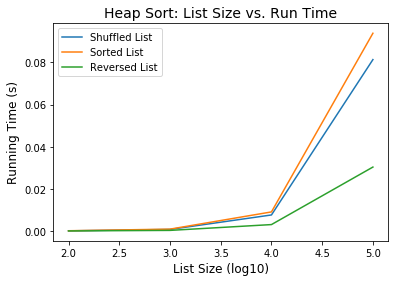

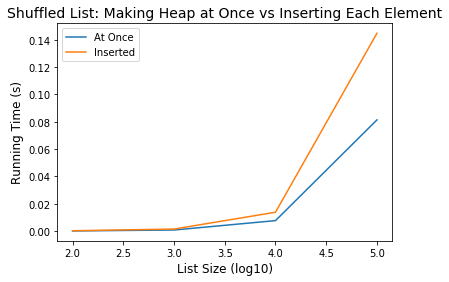

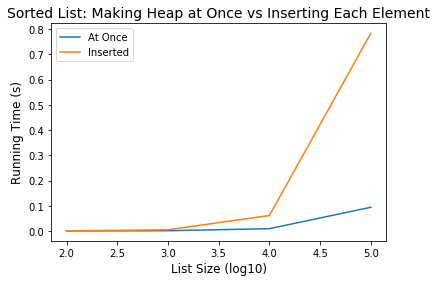

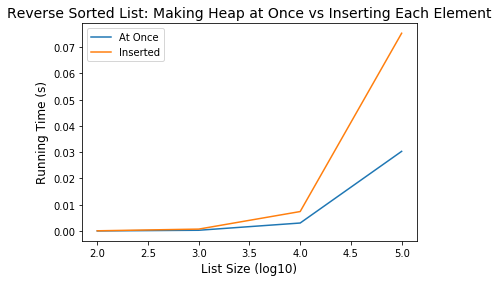

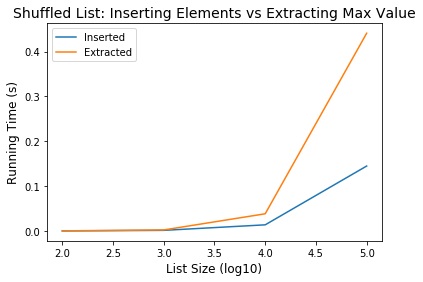

In [74]:
trials = [100, 1000, 10000, 100000] #List Sizes
lst = [] 
r_sf = [] #result shuffle 
r_s = [] #result sorted
r_r = [] #result reverse
r_i_sf = [] #result insert shuffled
r_i_s = [] #result insert sorted
r_i_r = [] #result insert reverse
r_e_sf = [] #result extract shuffled

for length in trials: #Iterates so long as there are more lists to do
    lst = [rand.random() for i in range(length)] #Creates a list of random values
    
    #Shuffled List
    rand.shuffle(lst) 
    r_sf.append(benchmark_heap(lst)) #Making heap all at once testbench 
    r_i_sf.append(benchmark_heap_insert(lst)) #Making heap by inserting elements indiv testbench
    r_e_sf.append(benchmark_heap_extract(lst))#Testbench for extracting largests val in heap
    
    #Sorted List Smallest->Largest
    lst.sort()
    r_s.append(benchmark_heap(lst)) #Calls the benchmark and stores average time
    r_i_s.append(benchmark_heap_insert(lst)) #Calls the benchmark and stores average time+
    
    #Reverse Order List Largest->Smallest
    lst.reverse()
    r_r.append(benchmark_heap(lst)) #Calls the benchmark and stores average time
    r_i_r.append(benchmark_heap_insert(lst)) #Calls the benchmark and stores average time

plotHeap(trials, r_sf, r_s, r_r)
plotHeap_insert(trials, r_sf, r_s, r_r, r_i_sf, r_i_s, r_i_r)
plotHeap_extract(trials, r_i_sf, r_e_sf)